In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# Load the data

df = pd.read_csv("/home/inventor/Datasets/Medical Cost/Medical_Cost/insurance.csv")

In [149]:
df.shape

(1338, 7)

In [150]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [151]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [152]:
df.duplicated().sum()

np.int64(1)

In [153]:
df = df.drop_duplicates()

In [154]:
df.duplicated().sum()

np.int64(0)

In [155]:
num_cols = [feature for feature in df.columns if df[feature].dtype in ["int64", "float64"]]
cat_cols = [feature for feature in df.columns if df[feature].dtype not in ["int64", "float64"]]

In [156]:
corr_matrix = df[num_cols].corr()

<Axes: >

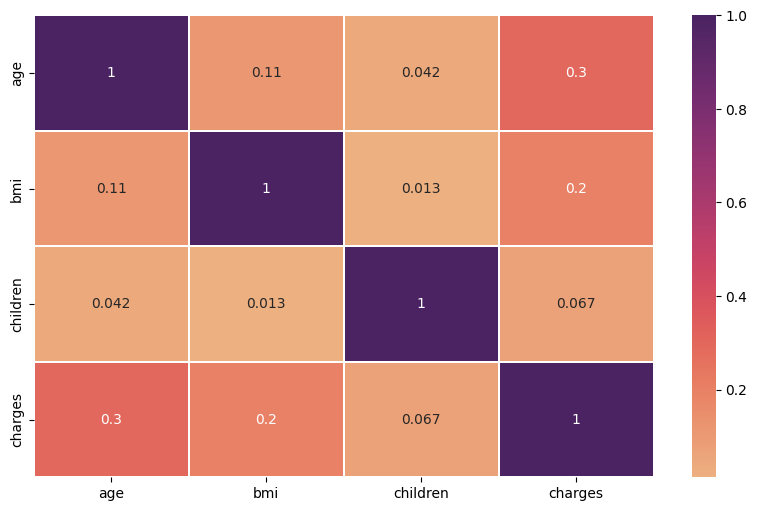

In [157]:
plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True), linewidths=0.2)

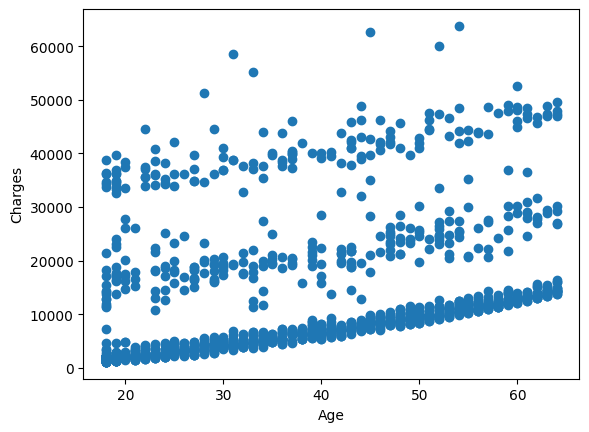

In [158]:
plt.scatter(df["age"], df["charges"])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [159]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


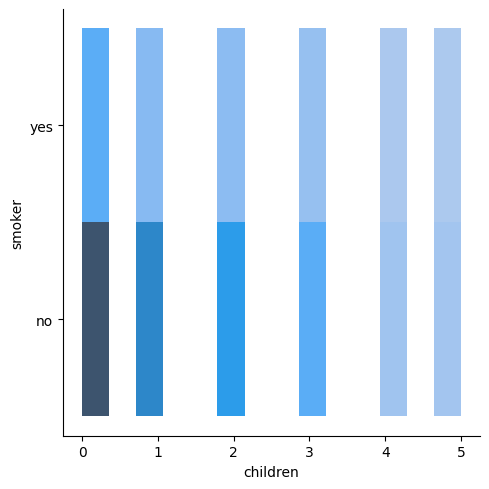

In [58]:
sns.displot(x=df["children"], y=df["smoker"], kind="hist")

<Axes: ylabel='charges'>

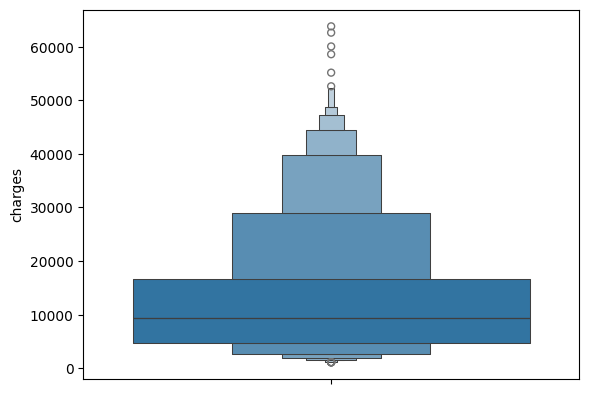

In [59]:
sns.boxenplot(df["charges"])

<Axes: >

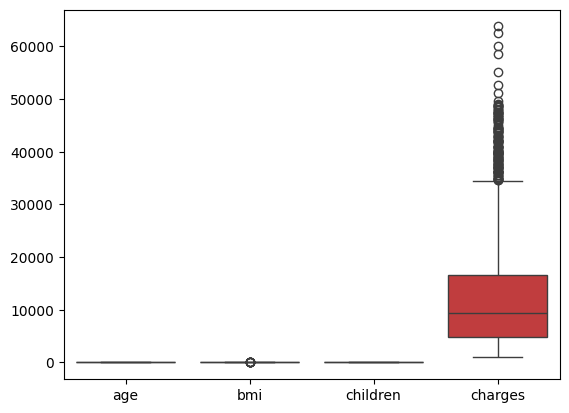

In [60]:
sns.boxplot(df)

In [160]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [183]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,0.297857
1,-1.511647,male,0.509422,-0.079442,no,southeast,-0.954381
2,-0.799350,male,0.383155,1.580143,no,southeast,-0.729373
3,-0.443201,male,-1.305052,-0.909234,no,northwest,0.719104
4,-0.514431,male,-0.292456,-0.909234,no,northwest,-0.777499


In [184]:
one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first", dtype=np.int64)

encoded = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=one_hot.get_feature_names_out(cat_cols), dtype="int64")

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()



,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,0.297857,0.0,1.0,0.0,0.0,1.0
1,-1.511647,male,0.509422,-0.079442,no,southeast,-0.954381,1.0,0.0,0.0,1.0,0.0
2,-0.799350,male,0.383155,1.580143,no,southeast,-0.729373,1.0,0.0,0.0,1.0,0.0
3,-0.443201,male,-1.305052,-0.909234,no,northwest,0.719104,1.0,0.0,1.0,0.0,0.0
4,-0.514431,male,-0.292456,-0.909234,no,northwest,-0.777499,1.0,0.0,1.0,0.0,0.0


In [185]:
# Drop the Original COlumns

encoded_df.drop(["sex", "smoker", "region"], axis=1, inplace=True)

In [186]:
encoded_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,0.0,1.0,0.0,0.0,1.0
1,-1.511647,0.509422,-0.079442,-0.954381,1.0,0.0,0.0,1.0,0.0
2,-0.799350,0.383155,1.580143,-0.729373,1.0,0.0,0.0,1.0,0.0
3,-0.443201,-1.305052,-0.909234,0.719104,1.0,0.0,1.0,0.0,0.0
4,-0.514431,-0.292456,-0.909234,-0.777499,1.0,0.0,1.0,0.0,0.0


In [187]:
encoded_df.isnull().sum()

age                 1
bmi                 1
children            1
charges             1
sex_male            1
smoker_yes          1
region_northwest    1
region_southeast    1
region_southwest    1
dtype: int64

In [188]:
encoded_df.dropna(inplace=True)

In [189]:
# Change the datatypes

encoded_df["sex_male"] = encoded_df["sex_male"].astype("int64")
encoded_df["smoker_yes"] = encoded_df["smoker_yes"].astype("int64")
encoded_df["region_northwest"] = encoded_df["region_northwest"].astype("int64")
encoded_df["region_southeast"] = encoded_df["region_southeast"].astype("int64")
encoded_df["region_southwest"] = encoded_df["region_southwest"].astype("int64")

In [190]:
encoded_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,0,1,0,0,1
1,-1.511647,0.509422,-0.079442,-0.954381,1,0,0,1,0
2,-0.799350,0.383155,1.580143,-0.729373,1,0,0,1,0
3,-0.443201,-1.305052,-0.909234,0.719104,1,0,1,0,0
4,-0.514431,-0.292456,-0.909234,-0.777499,1,0,1,0,0


In [191]:
class PCA_Custom():

    def __init__(self, n_components):

        self.n_compoenets = n_components
        self.components = None
        self.variance = None
        self.explained_variance_ratio = None
        
    def fit(self, X):

        # Center the data

        X_centered = X - X.mean()

        cov_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        sort_indices = np.argsort(eigenvalues)[::-1]

        eigenvalues = eigenvalues[sort_indices]

        eigenvectors = eigenvectors[:, sort_indices]

        self.variance = eigenvalues[:self.n_compoenets]
        self.components = eigenvectors[:, :self.n_compoenets]

        self.explained_variance_ratio = eigenvalues / np.sum(self.variance)
    
    def transform(self, X):

        X_centered = X - X.mean()

        return np.dot(X_centered, self.components)

    def fit_transform(self, X):

        self.fit(X)

        return self.transform(X)

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("charges", axis=1), encoded_df["charges"], test_size=0.2, random_state=42)

In [231]:
pca_custom = PCA_Custom(n_components=1)

X_train = pca_custom.fit_transform(X_train)

X_test = pca_custom.transform(X_test)

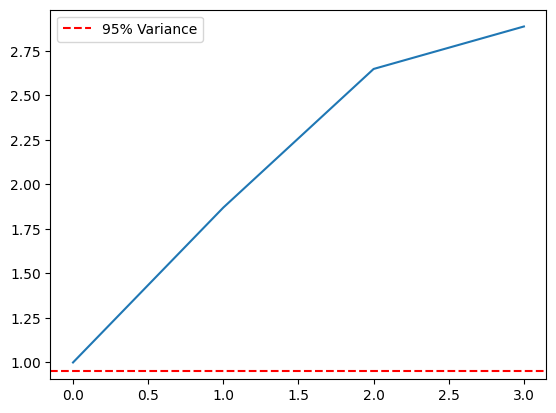

In [232]:
cum = np.cumsum(pca_custom.explained_variance_ratio)
threshold = 0.95

plt.plot(cum)
plt.axhline(y=threshold, color="r", linestyle="--", label="95% Variance")
plt.legend()
plt.show()

In [233]:
class ElasticNET_Custom():

    def __init__(self, learning_rate, epochs, alpha, l1_ratio):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.l1_ratio = l1_ratio
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):
            
            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(y_train.T, X_train) + np.dot(self.alpha, (np.dot(self.l1_ratio, np.sign(self.coef_)) + np.dot((1 - self.l1_ratio), self.coef_)))

            self.coef_ = self.coef_ - (self.lr * coef_slope)

        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.dot(X_test, self.coef_)
        return y_pred

In [234]:
elastic_c = ElasticNET_Custom(learning_rate=0.001, epochs=5000, alpha=0.01, l1_ratio=0.5)

In [235]:
elastic_c.fit(X_train, y_train)

Coef_: [-0.03421891  0.30379464]


In [236]:
y_pred_e = elastic_c.predict(X_test)

In [237]:
from sklearn.metrics import r2_score

r2_score_e = r2_score(y_test, y_pred_e)

r2_score_e

0.09858203886608619

In [238]:
class Ridge():

    def __init__(self, alpha):

        self.coef_ = None
        self.intercept_ = None
        self.alpha = alpha
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        I = np.identity(X_train.shape[1])

        betas = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)

        self.coef_ = betas[1:]
        self.intercept_ = betas[0]

        print(f"Intercept_: {self.intercept_}, Coef_: {self.coef_}")
    
    def predict(self, X_test):

        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

In [239]:
ridge_c = Ridge(alpha=0.01)

In [240]:
ridge_c.fit(X_train, y_train)

Intercept_: -0.034223435938385706, Coef_: [0.30379755]


In [241]:
y_pred_r = ridge_c.predict(X_test)

In [242]:
r2_score_r = r2_score(y_test, y_pred_r)

r2_score_r

0.09858114110275962

In [243]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_sk = lr.predict(X_test)

In [244]:
r2_score_sk = r2_score(y_test, y_pred_sk)

r2_score_sk

0.09858134844097133

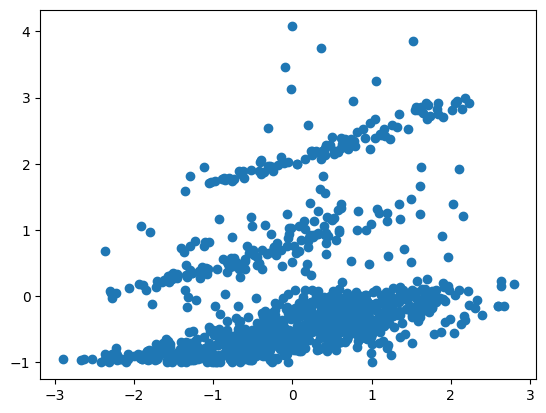

In [245]:
plt.scatter(X_train, y_train)